<a href="https://colab.research.google.com/github/manujism/Microsoft-Price-Prediction-Using-Linear-Regression/blob/main/Microsoft_LinearReg_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf
from sklearn.linear_model import LinearRegression
from datetime import datetime, timedelta
from sklearn import metrics

In [2]:
# Define time range
end_date = datetime.today()
start_date = end_date - timedelta(days=365*5)

In [3]:
# Download MSFT data
msft = yf.download('MSFT', start=start_date, end=end_date)
msft = msft[['Close']]
msft.dropna(inplace=True)

print(msft.head())

YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed

Price            Close
Ticker            MSFT
Date                  
2020-03-31  150.956665
2020-04-01  145.596420
2020-04-02  148.611557
2020-04-03  147.242813
2020-04-06  158.192947


Text(0.5, 1.0, 'Microsoft (MSFT) Historical Price')

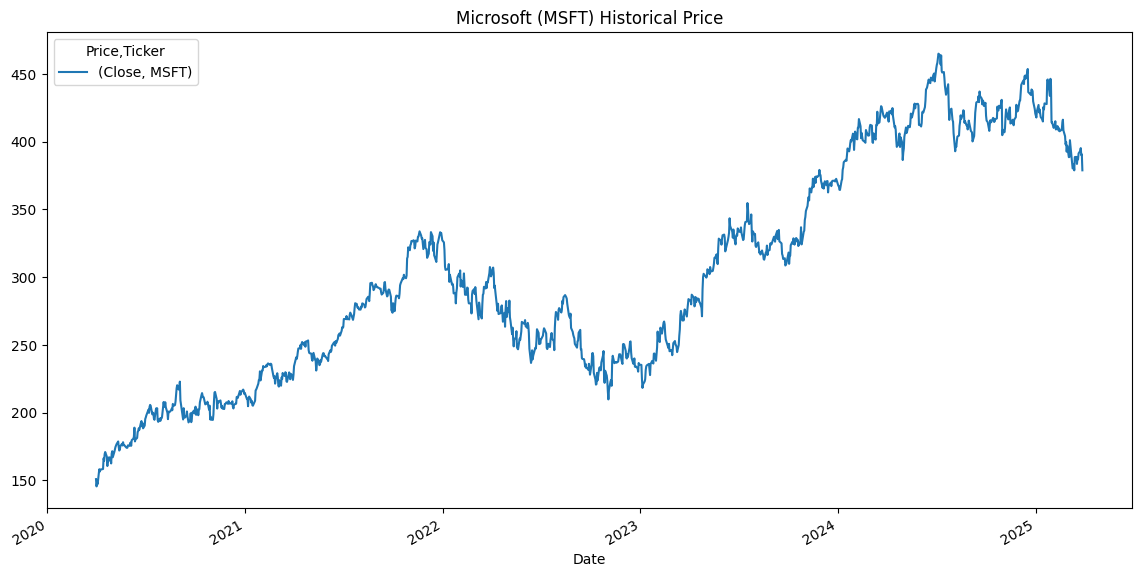

In [4]:
# Plot raw price
msft[['Close']].plot(figsize=(14, 7))
plt.title('Microsoft (MSFT) Historical Price')


In [6]:
# Create dataframe and convert dates
df = msft[['Close']].reset_index()
msft['Date_ordinal'] = msft.index.map(datetime.toordinal)

In [8]:
# Prepare data for regression
X = msft['Date_ordinal'].values.reshape(-1, 1)
y = msft['Close'].values.reshape(-1, 1)

In [9]:
# Fit linear regression
model = LinearRegression()
model.fit(X, y)

# Predict
msft['Predicted_Close'] = model.predict(X)

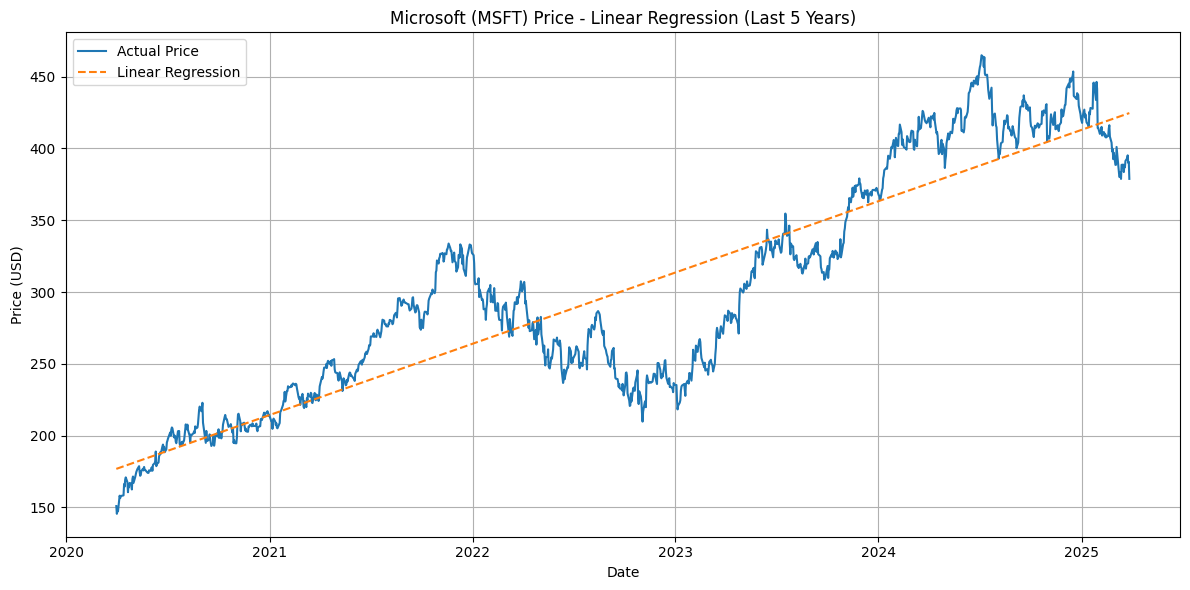

In [10]:
# Plot actual vs predicted
plt.figure(figsize=(12, 6))
plt.plot(msft.index, msft['Close'], label='Actual Price')
plt.plot(msft.index, msft['Predicted_Close'], label='Linear Regression', linestyle='--')
plt.title('Microsoft (MSFT) Price - Linear Regression (Last 5 Years)')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [11]:
# Print regression coefficients
slope = model.coef_[0][0]
intercept = model.intercept_[0]
print(f"Regression Equation: Price = {slope:.2f} * Date_ordinal + {intercept:.2f}")


Regression Equation: Price = 0.14 * Date_ordinal + -100044.05


In [12]:
# Evaluate model
r_squared = model.score(X, y)
mae = metrics.mean_absolute_error(y, msft['Predicted_Close'])
mse = metrics.mean_squared_error(y, msft['Predicted_Close'])
rmse = np.sqrt(mse)

print("\nModel Performance Metrics:")
print(f"R-squared: {r_squared:.4f}")
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")


Model Performance Metrics:
R-squared: 0.8006
Mean Absolute Error (MAE): 27.8574
Mean Squared Error (MSE): 1276.5613
Root Mean Squared Error (RMSE): 35.7290


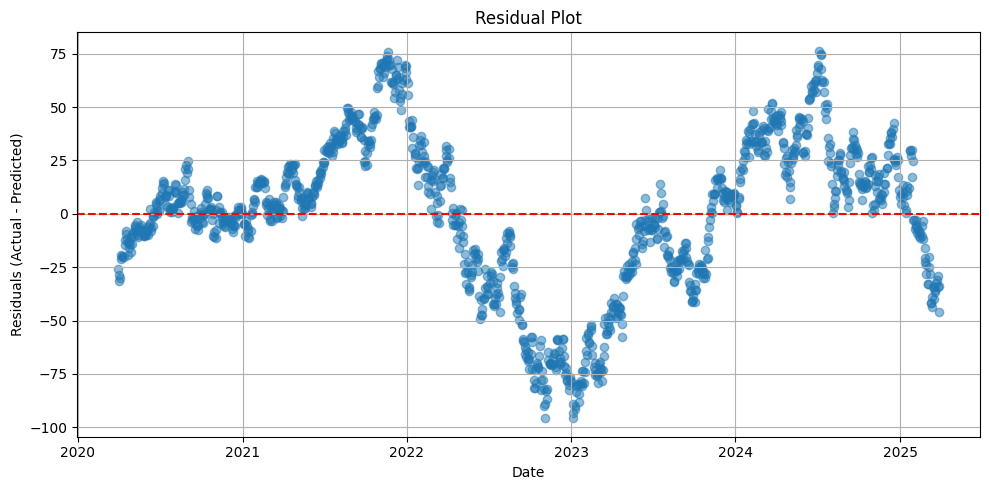

In [13]:
# Plot residuals
residuals = y.flatten() - msft['Predicted_Close'].values
plt.figure(figsize=(10, 5))
plt.scatter(msft.index, residuals, alpha=0.5)
plt.axhline(0, color='red', linestyle='--')
plt.title("Residual Plot")
plt.xlabel("Date")
plt.ylabel("Residuals (Actual - Predicted)")
plt.grid(True)
plt.tight_layout()
plt.show()

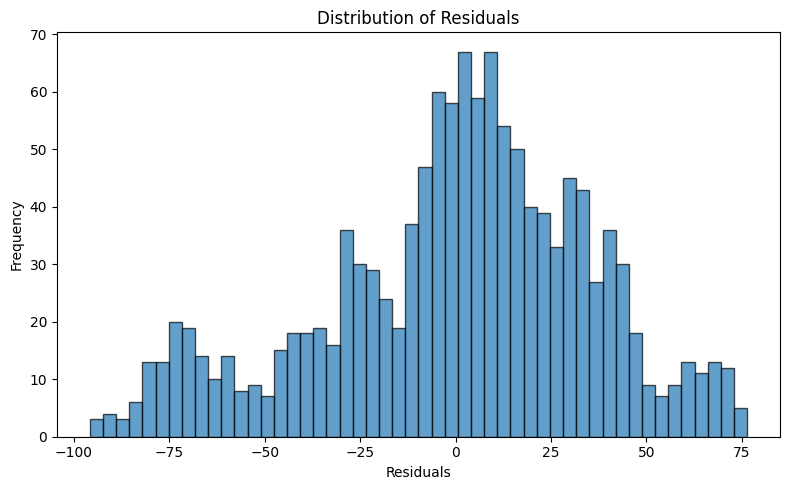

In [14]:
# Histogram of residuals
plt.figure(figsize=(8, 5))
plt.hist(residuals, bins=50, edgecolor='k', alpha=0.7)
plt.title("Distribution of Residuals")
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()

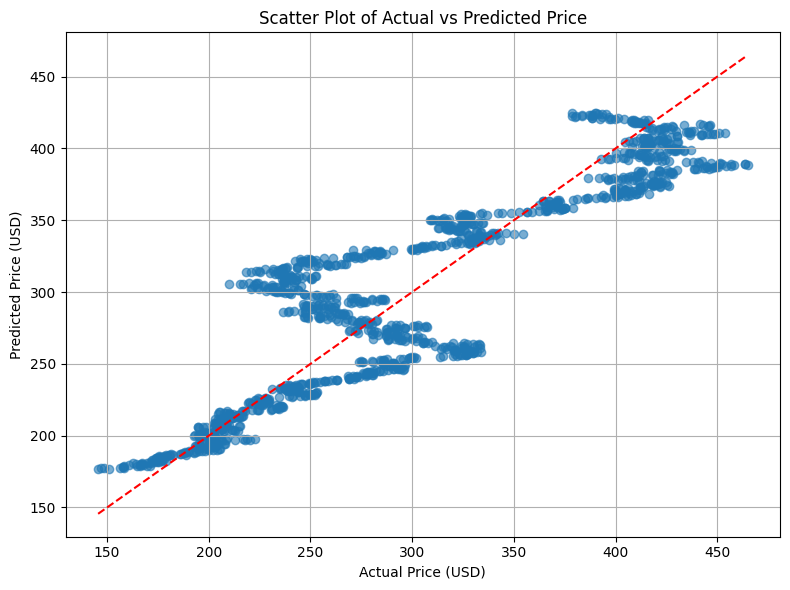

In [17]:
# Scatter plot of actual vs predicted price
plt.figure(figsize=(8, 6))
plt.scatter(msft['Close'], msft['Predicted_Close'], alpha=0.6)
plt.plot([msft['Close'].min(), msft['Close'].max()], [msft['Close'].min(), msft['Close'].max()], 'r--')
plt.xlabel('Actual Price (USD)')
plt.ylabel('Predicted Price (USD)')
plt.title('Scatter Plot of Actual vs Predicted Price')
plt.grid(True)
plt.tight_layout()
plt.show()